In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Types of Data

### Data

1. Quantitative 
    - it deals with numbers and things you can measure
    - weight, mass, height, speed, price
    


    
2. Qualitative
    - data that deals with characteristics and descriptors that cannot be measured easily


----------------

### Quantitative Data

1. Discrete 
    - Some synonyms for the word “discrete” include: disconnected, separate and distinct. In other words, a definite number in a finite set
    - price, gender, number of push ups, etc
    
2. Continuous
    - data that could be any number between a particular range
    - data which could be reduced to finer levels
    - weight, mass, temperature
    
---------

### Qualitative Data or Categorical Data

- a categorical variable is a variable that can take on one of a limited, and usually fixed
- Typically, any data attribute which is categorical in nature represents discrete values which belong to a specific finite set of **categories or classes**. Example: Cat or Dog, Apple or Banana



1. Ordinal data
    - Data which is ordered. 
    - Low, Medium and High
2. Nominal data
    - Unordered data
    

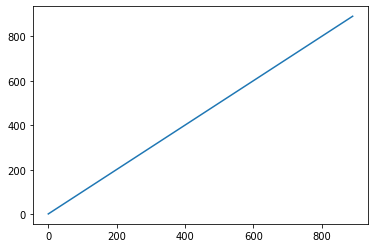

In [4]:
#Discrete Data

plt.plot(data.PassengerId)

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

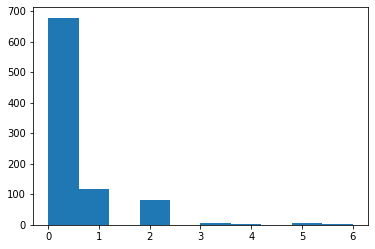

In [5]:
#Discrete data

plt.hist(data.Parch)

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

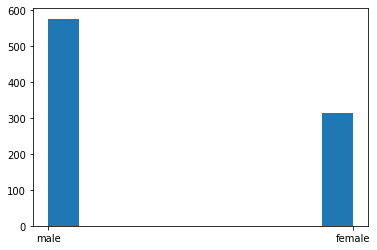

In [6]:
#Categorical Data - nominal

plt.hist(data.Sex)

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

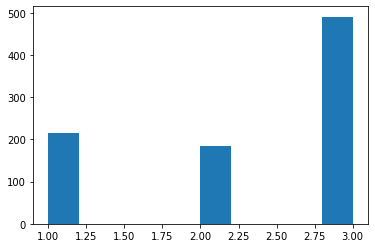

In [7]:
#Categorical Data - Ordinal

plt.hist(data.Pclass)

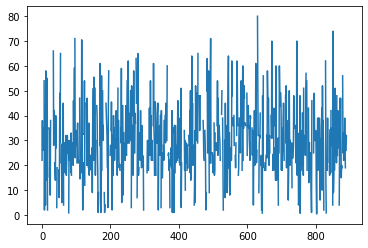

In [8]:
#Continous Data

plt.plot(data.Age)

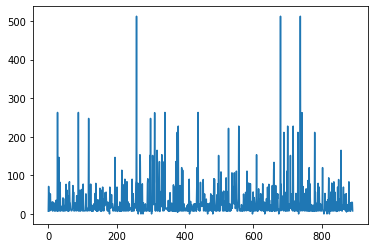

In [9]:
#Continous Data

plt.plot(data.Fare)

## Age and Sex

In [10]:
len(data.loc[data.Survived == 0]), len(data.loc[data.Survived == 1])

(549, 342)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

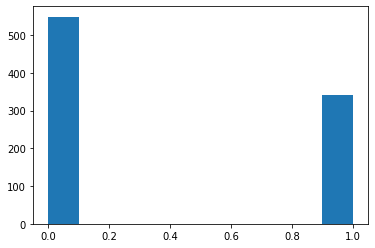

In [11]:
plt.hist(data.Survived)

In [13]:
age_18 = len(data.loc[(data.Age > 11) & (data.Age<=18)])
age_18_30 = len(data.loc[(data.Age > 18) & (data.Age<=30)])
age_30_50 = len(data.loc[(data.Age > 30) & (data.Age<=50)])
age_50_ = len(data.loc[data.Age<50])

In [14]:
age = [age_18, age_18_30, age_30_50, age_50_]

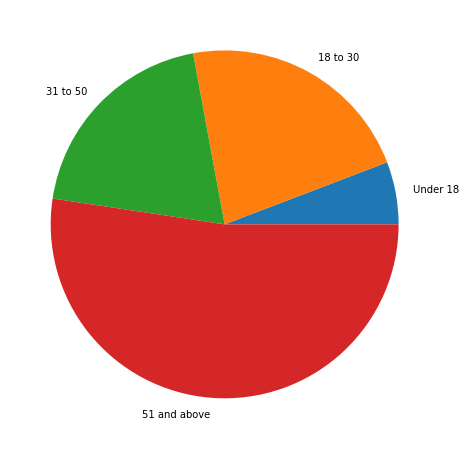

In [15]:
plt.figure(figsize=(10, 8))
plt.pie(age, labels=['Under 18', '18 to 30', '31 to 50', '51 and above'])
plt.show()

In [16]:
df = [data]
for dataset in df:
    dataset['Age'] = dataset['Age']
    dataset.loc[ dataset['Age'] <= 18, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 4
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 5

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([139.,   0., 270.,   0., 155.,   0.,  86.,   0.,  42.,  22.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

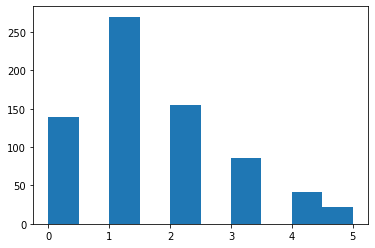

In [17]:
plt.hist(data.Age)

In [18]:
data.Age = data.Age.fillna(data.Age.median())

In [19]:
data.Age.unique()

array([1., 2., 4., 0., 5., 3.])

<BarContainer object of 6 artists>

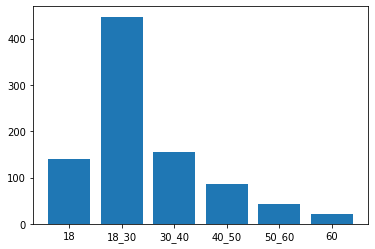

In [20]:
age = {'18': len(data.loc[data.Age == 0].Age),
      '18_30': len(data.loc[data.Age == 1].Age),
      '30_40': len(data.loc[data.Age == 2].Age),
      '40_50': len(data.loc[data.Age == 3].Age),
      '50_60': len(data.loc[data.Age == 4].Age),
      '60' : len(data.loc[data.Age == 5].Age)}


keys = list(age.keys())
values = list(age.values())

plt.bar(keys, values)

In [21]:
import seaborn as sns

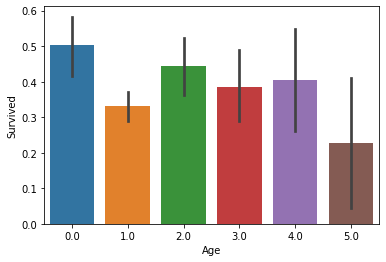

In [22]:
sns.barplot('Age', 'Survived', data=data)

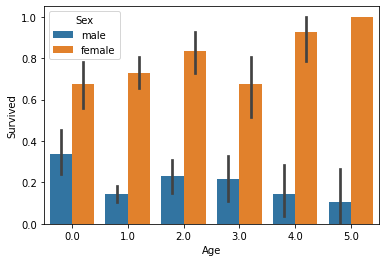

In [23]:
sns.barplot('Age', 'Survived', data=data, hue='Sex')

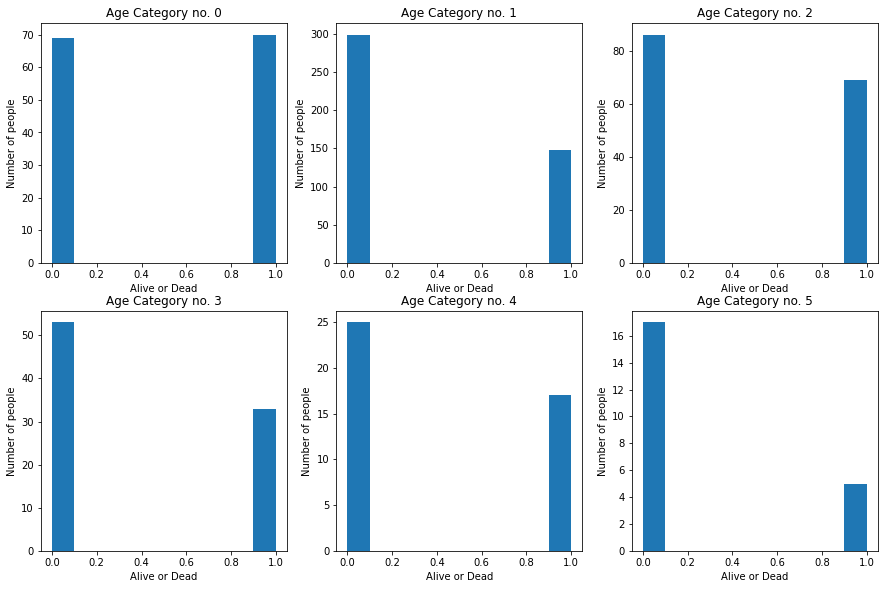

In [24]:
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.hist(data.loc[data.Age==i].Survived)
    plt.title(f'Age Category no. {i}')
    plt.xlabel('Alive or Dead')
    plt.ylabel('Number of people')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


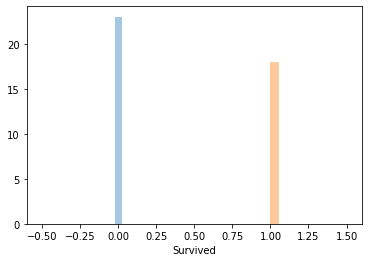

In [25]:
sns.distplot(data.loc[data.Survived==0].Survived)
sns.distplot(data.loc[data.Survived==1].Survived)

In [26]:
sex = {'male':0,
'female':1}

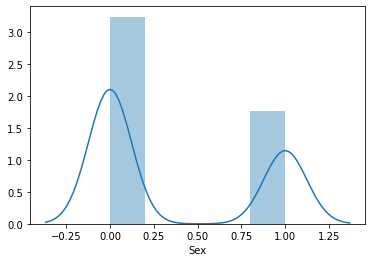

In [27]:
sns.distplot(data.Sex.map(sex))

In [28]:
data.Sex = data.Sex.map(sex)

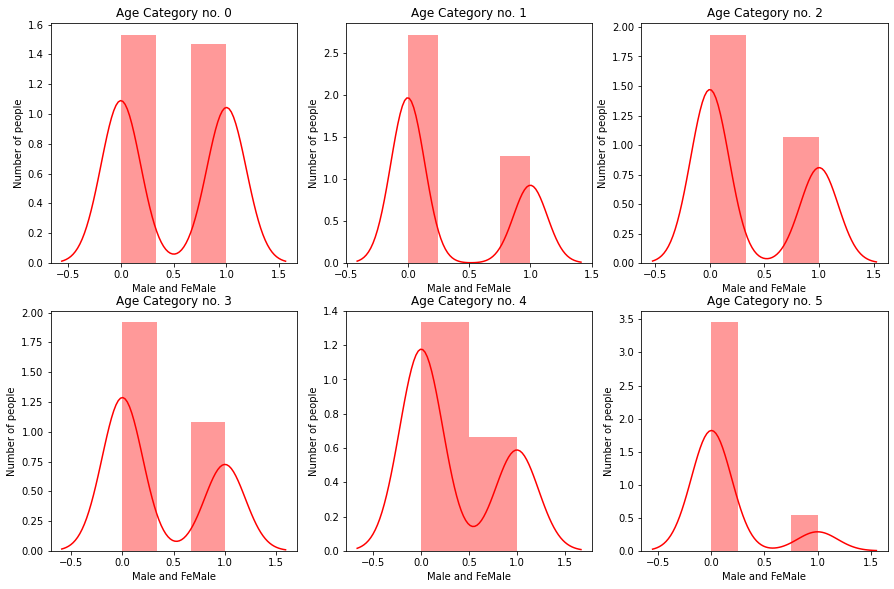

In [29]:
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,3,i+1)
    sns.distplot(data.loc[data.Age==i].Sex, color='r')
    plt.title(f'Age Category no. {i}')
    plt.xlabel('Male and FeMale')
    plt.ylabel('Number of people')

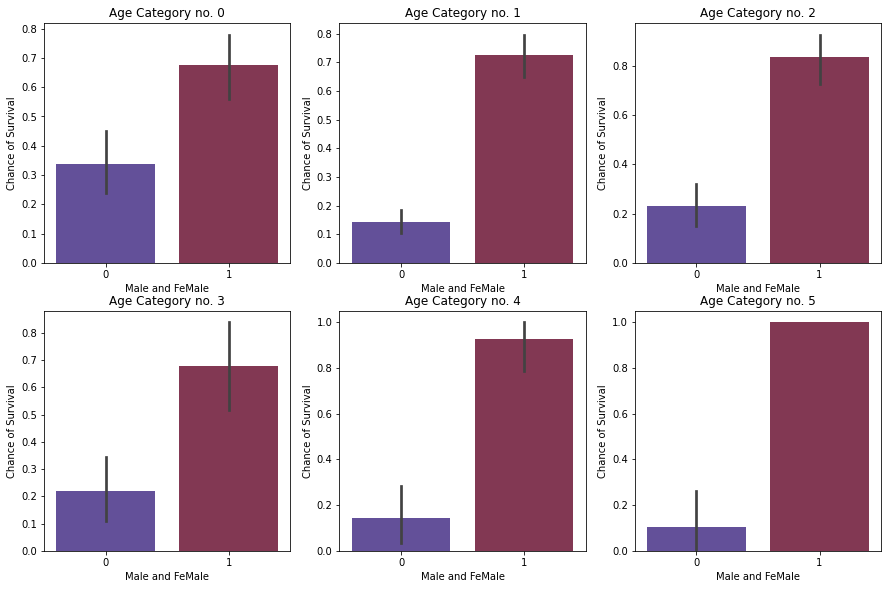

In [40]:
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,3,i+1)
    sns.barplot(data.loc[data.Age==i].Sex, data.loc[data.Age==i].Survived, palette='twilight')
    plt.title(f'Age Category no. {i}')
    plt.xlabel('Male and FeMale')
    plt.ylabel('Chance of Survival')

## Class 

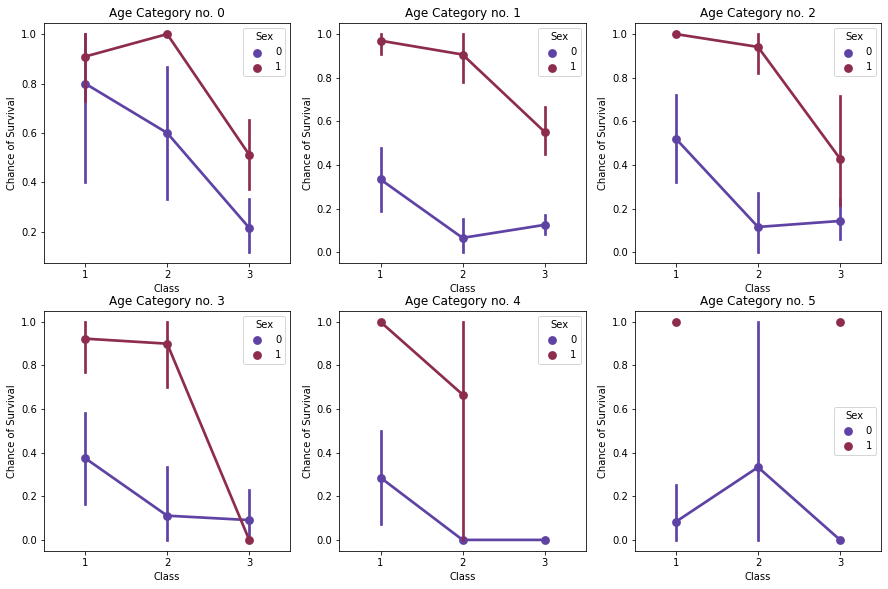

In [41]:
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,3,i+1)
    sns.pointplot(data.loc[data.Age==i].Pclass, data.loc[data.Age==i].Survived, hue=data.loc[data.Age==i].Sex,
                 palette='twilight')
    plt.title(f'Age Category no. {i}')
    plt.xlabel('Class')
    plt.ylabel('Chance of Survival')

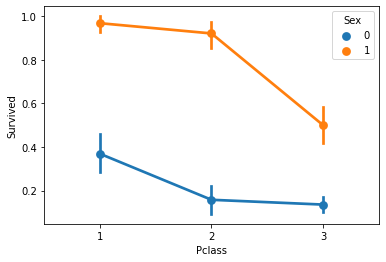

In [32]:
sns.pointplot(data.Pclass, data.Survived, hue=data.Sex)

## Relatives

In [33]:
df = [data]
for dataset in df:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [34]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",0,1.0,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,4.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,C,1,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


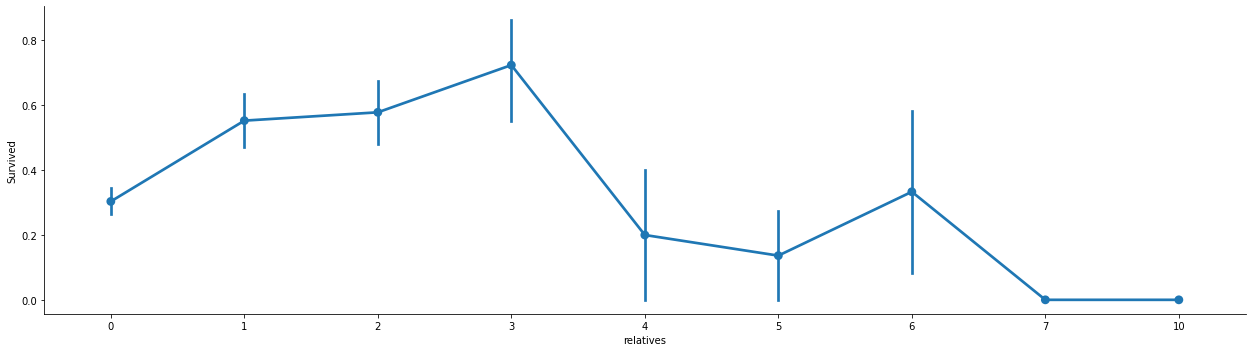

In [35]:
axes = sns.factorplot('relatives','Survived', 
                      data=data, aspect = 3.5, )

plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


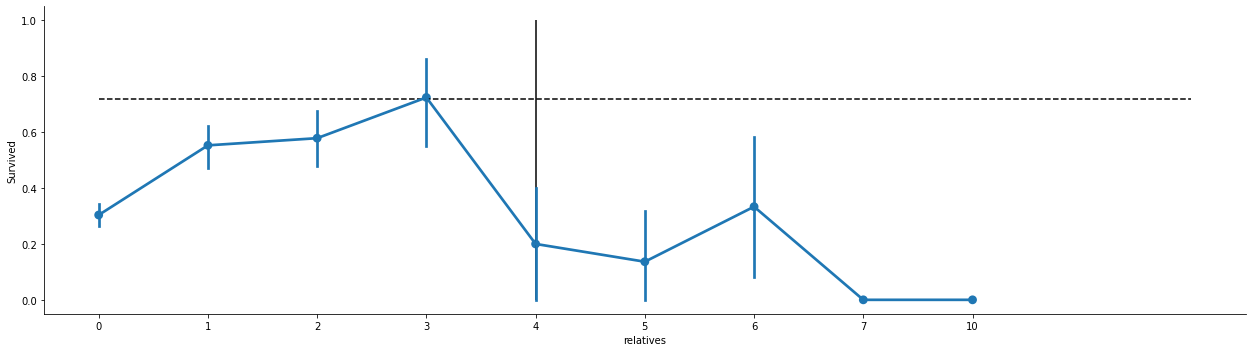

In [36]:
axes = sns.factorplot('relatives','Survived', 
                      data=data, aspect = 3.5, )
plt.hlines(0.72, 0, 10, linestyles='--')
plt.vlines(4, 0, 1)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


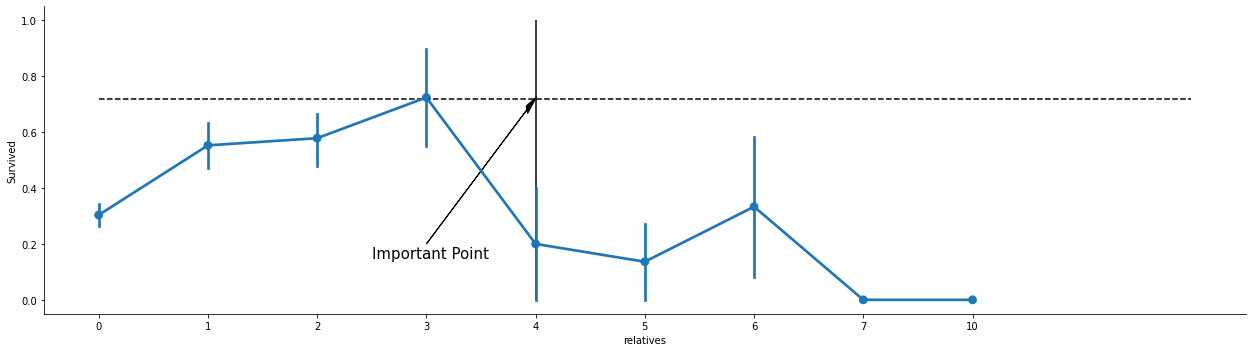

In [37]:
axes = sns.factorplot('relatives','Survived', 
                      data=data, aspect = 3.5, )
plt.hlines(0.72, 0, 10, linestyles='--')
plt.vlines(4, 0, 1)
plt.arrow(3, 0.2, 0.92, 0.48, head_width=0.03, head_length=0.1, fc='k', ec='k', label = 'nice')
plt.annotate('Important Point', xy=(2.5,0.15), fontsize=15)
plt.show()